In [1]:
# import libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **1. Data Preparation**

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 22:37:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 1.27M 1s
    50K .......... .......... .......... .......... ..........  7%  857K 1s
   100K .......... .......... .......... .......... .......... 10% 1.37M 1s
   150K .......... .......... .......... .......... .......... 14%  711K 1s
   200K .......... .......... .......... .......... .......... 17% 15.4M 1s
   250K .......... .......... .......... .......... .......... 21% 1.32M 1s
   300K .......... .......... .......... .......... .......... 25% 2.08M 1s
   350K .......... .......... ..

In [3]:
# load the dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows")

There are 10 columns and 20640 rows


In [77]:
# filter the dataset by ocean_proximity: '<1H OCEAN' OR 'INLAND'
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df.drop(columns='ocean_proximity').reset_index(drop=True)

In [78]:
# check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [79]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows for the filtered dataset")

There are 9 columns and 15687 rows for the filtered dataset


### **2. Explaratory Data Analysis**

In [80]:
# check the null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Question 1: There's one feature with missing values. What is it?

In [81]:
print("There are 157 null values in total_bedrooms column")

There are 157 null values in total_bedrooms column


#### Question 2: What's the median (50% percentile) for variable 'population'?

In [82]:
# check the summary statistics of the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:
print(f"The median of population is {df.population.median()}")

The median of population is 1195.0


Text(0.5, 1.0, 'Distribution of Median House Value')

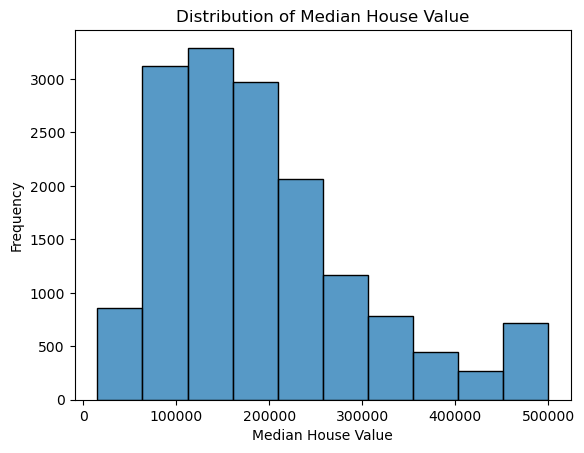

In [84]:
# visualize the distribution of median house value using histogram
sns.histplot(df.median_house_value, bins=10)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')

The histogram depics that the median house value has a right-tail (positively skewed) distribution

### **3. Setting up the Validation Framework**

In [85]:
# split the dataset in train/val/test sets, with 60%/20%/20% distribution
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [86]:
# check the number of rows each distributions
n_val, n_test, n_train

(3137, 3137, 9413)

In [87]:
# set a random shuffle using seed(42)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [88]:
# shuffle the datasets
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [89]:
# check the train dataset
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [90]:
# make sure that the number of rows each datasets is same with its distribution
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [91]:
# apply the log transformation to the median_house_value variable using the np.log1p() function
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [92]:
# drop the median_house_column from the datasets
df_train = df_train.drop(columns='median_house_value')
df_val = df_val.drop(columns='median_house_value')
df_test = df_test.drop(columns='median_house_value')

In [93]:
# define a function to prepare the X matrix
def prepare_X(df, fill_method):
    df = df.fillna(fill_method)
    X = df.values
    return X

In [94]:
# set a variable for mean of total_bedrooms column
mean_bedrooms = df_train['total_bedrooms'].mean()

# transform the datasets into matrices by impute the null values as 0 and mean_bedrooms
X_train_zero = prepare_X(df_train, 0)
X_train_mean = prepare_X(df_train, mean_bedrooms)

X_val_zero = prepare_X(df_val, 0)
X_val_mean = prepare_X(df_val, mean_bedrooms)

X_test_zero = prepare_X(df_test, 0)
X_test_mean = prepare_X(df_test, mean_bedrooms)

### **4. Linear Regression**

In [95]:
# define a linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [96]:
# train the model by using different X_train (zero and mean)
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [97]:
# input the X_val matrix into the linear regression model
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

### **5. RMSE**

In [98]:
# define a RMSE function
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Question 3: Which option gives better RMSE between fillna(0) or fillna(mean)?

In [99]:
# calculate the RMSE for y_pred_zero
score_zero = rmse(y_pred_zero, y_val)
round(score_zero, 2)

0.34

In [100]:
# calculate the RMSE for y_pred_mean
score_mean = rmse(y_pred_mean, y_val)
round(score_mean, 2)

0.34

In [101]:
print("Both are equally good")

Both are equally good


### **6. Linear Regression with Regularization**

In [102]:
# define a linear regression with regularization function
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [103]:
# transform the datasets into matrices by impute the null values as 0
X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)

# loop the process of train->predict->rmse to find the best R
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_pred, y_val)
    
    print(f"r: {r}, w0: {w0}, rmse: {score}")

r: 0.0, w0: -9.763249477825624, rmse: 0.34084790341590543
r: 1e-06, w0: -9.763228830975619, rmse: 0.34084790618218563
r: 0.0001, w0: -9.761185235427776, rmse: 0.3408481800557182
r: 0.001, w0: -9.742646250116293, rmse: 0.34085069218459585
r: 0.01, w0: -9.561056193231325, rmse: 0.34087793005233935
r: 1, w0: -3.1331542783986586, rmse: 0.3448958327639019
r: 5, w0: -0.841086797552381, rmse: 0.34773980704846963
r: 10, w0: -0.4381172315561054, rmse: 0.348314983351884


#### Question 4: Which r gives the best RMSE using Regularization?

In [104]:
print("r: 0 gives the best RMSE: 0.34084790341590543")

r: 0 gives the best RMSE: 0.34084790341590543


#### Question 5: What's the value of STD using different seed values?

In [105]:
# set the seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# set the list of rmse_scores
rmse_scores = []

# loop the process from prepare the datasets to evaluate the model
for s in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    df_train = df_train.drop(columns='median_house_value')
    df_val = df_val.drop(columns='median_house_value')
    df_test = df_test.drop(columns='median_house_value')

    X_train = prepare_X(df_train, 0)
    X_val = prepare_X(df_val, 0)
    X_test = prepare_X(df_test, 0)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_pred, y_val)
    rmse_scores.append(rmse_score)

In [106]:
# check the rmse_scores
rmse_scores

[0.3377387160067942,
 0.33779993536635067,
 0.3384287006757561,
 0.3320049468302922,
 0.33944518625573017,
 0.34338197052508884,
 0.3385330211773327,
 0.34687476972982134,
 0.35127368659591834,
 0.33415582665259735]

In [107]:
# calculate the std of rmse_scores
std = np.std(rmse_scores)
print(f"The value of std is {round(std, 3)}")

The value of std is 0.005


#### Question 6: What's the RMSE value on the test dataset?

In [108]:
# split the dataset in train+val/test sets, with 80%/20% distribution
n = len(df)
n_test = int(n * 0.2)
n_full_train = n - n_test

In [109]:
# set a random shuffle using seed(9)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [110]:
# shuffle the datasets
df_full_train = df.iloc[idx[:n_full_train]].reset_index(drop=True)
df_test = df.iloc[idx[n_full_train:]].reset_index(drop=True) 

In [111]:
# apply the log transformation to the median_house_value variable using the np.log1p() function
y_full_train = np.log1p(df_full_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [112]:
# drop the median_house_colum from the datasets
df_full_train = df_full_train.drop(columns='median_house_value')
df_test = df_test.drop(columns='median_house_value')

In [113]:
# transform the datasets into matrices by impute the null values as 0
X_full_train = prepare_X(df_full_train, 0)
X_test = prepare_X(df_test, 0)

In [114]:
# train the model using linear_regression_regularization
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [115]:
# input the X_test matrix into the linear regression model
y_pred = w0 + X_test.dot(w)

In [116]:
# calculate the RMSE
rmse(y_pred, y_test)

0.33498993366100027